In [6]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 1.4 MB/s eta 0:00:29
   ---------------------------------------- 0.3/38.8 MB 4.0 MB/s eta 0:00:10
    --------------------------------------- 0.6/38.8 MB 5.4 MB/s eta 0:00:08
   - -------------------------------------- 1.0/38.8 MB 6.2 MB/s eta 0:00:07
   - -------------------------------------- 1.4/38.8 MB 6.9 MB/s eta 0:00:06
   - -------------------------------------- 1.8/38.8 MB 7.7 MB/s eta 0:00:05
   - -------------------------------------- 1.8/38.8 MB 7.7 MB/s eta 0:00:05
   --- ------------------------------------ 3.0/38.8 MB 8.7 MB/s eta 0:00:05
   --- ------------------------------------ 3.5/38.8 MB 9.0 MB/s eta 0:00:04
   ---- ----------------------------------- 4.0/38.8 MB 9.2 MB/s eta 0:00:04
   ---- ----------------------------------- 4.6/38.8 MB 9.5 MB/s eta 0:00:04
   ----- ---------------------------------- 5.1/38.8 MB 9.6 MB/s eta 0:00:04
   ---

In [8]:
import numpy as np
import cv2 #utilisé dans les domaines de reconnaissance d'image
import os
import random
import matplotlib.pyplot as plt
import pickle #pour stocker les data ??

In [9]:
DIRECTORY = "./dataset/train"

In [10]:
CATEGORIES = ["cats","dogs"]

Une array, ou tableau en français, est une structure de données qui stocke une collection d'éléments, généralement du même type, de manière contiguë en mémoire. Les arrays sont utilisés pour organiser des données afin qu'elles puissent être facilement et rapidement accédées. Voici quelques caractéristiques et utilisations des arrays :

Caractéristiques des Arrays : 

- Indexation : Les éléments d'un array sont accessibles via des indices. L'indexation commence généralement à 0, ce qui signifie que le premier élément a l'indice 0, le deuxième élément a l'indice 1, et ainsi de suite.

- Taille Fixe : La taille d'un array est déterminée au moment de sa création et ne peut pas être modifiée par la suite. (Il existe des structures de données similaires comme les listes en Python qui permettent une taille dynamique).

- Homogénéité : Dans de nombreux langages de programmation, les arrays contiennent des éléments du même type (par exemple, tous des entiers, tous des flottants, etc.).

In [16]:
for category in CATEGORIES : 
    folder = os.path.join(DIRECTORY,category)
    print(folder)

./dataset/train\cats
./dataset/train\dogs


In [17]:
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        print(img_path)
        break

./dataset/train\cats\cat.0.jpg
./dataset/train\dogs\dog.0.jpg


In [20]:
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        # plt.imshow(img_arr)
        break

### On fait un size pareil pour toutes les photos

In [26]:
IMG_SIZE = 100

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
        # plt.imshow(img_arr)
        break

### On index 0 pour chat et 1 pour chien

In [27]:
IMG_SIZE = 100
data = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)  # On index 0 pour chat et 1 pour chien
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        data.append([img_arr,label]) # chaque image aura un 0 ou 1 

In [28]:
len(data)

17133

### On melange les data

In [29]:
random.shuffle(data)

In [52]:
data[0] # Ce sont des pixels, puis nous pouvons voir que c'est indéxé 0, donc c'est un chat

[array([[[ 29,   4,   3],
         [ 33,   8,   4],
         [ 37,  14,   7],
         ...,
         [ 49,  15,   0],
         [ 43,  15,   1],
         [ 38,  14,   3]],
 
        [[ 34,  13,   0],
         [ 38,  18,   1],
         [ 41,  22,   2],
         ...,
         [ 42,  11,   0],
         [ 37,  11,   2],
         [ 29,  10,   2]],
 
        [[ 35,  13,   0],
         [ 39,  18,   2],
         [ 39,  19,   0],
         ...,
         [ 37,  11,   5],
         [ 32,  10,   7],
         [ 21,   6,   3]],
 
        ...,
 
        [[109,  96, 100],
         [123, 108, 108],
         [133, 114, 107],
         ...,
         [ 87,  72,  70],
         [ 88,  73,  71],
         [ 96,  81,  78]],
 
        [[ 86,  81,  83],
         [132, 120, 120],
         [132, 113, 107],
         ...,
         [ 87,  72,  70],
         [ 86,  71,  69],
         [ 93,  78,  76]],
 
        [[ 96,  94, 102],
         [136, 130, 126],
         [140, 125, 117],
         ...,
         [ 82,  69,  67],
  

### On ajoute les features dans X et les lables dans y

In [32]:
X = []
y = []

for features,labels in data : 
    X.append(features)
    y.append(labels)

### On converti x et y en array

In [33]:
X = np.array(X)
y = np.array(y)

**Vous utilisez la fonction pickle.dump pour sérialiser les objets X et y. La sérialisation transforme ces objets Python en un flux de bytes.**

**Vous ouvrez deux fichiers en mode binaire écriture (wb), ce qui signifie que vous créez ou écrasez les fichiers "X.pkl" et "y.pkl" et que vous y écrivez des données binaires.**

In [49]:
pickle.dump(X,open("X.pkl","wb"))
pickle.dump(y,open("y.pkl","wb"))

In [50]:
x_load = pickle.load(open("X.pkl", "rb")) #pour lire
print(x_load)

[[[[ 29   4   3]
   [ 33   8   4]
   [ 37  14   7]
   ...
   [ 49  15   0]
   [ 43  15   1]
   [ 38  14   3]]

  [[ 34  13   0]
   [ 38  18   1]
   [ 41  22   2]
   ...
   [ 42  11   0]
   [ 37  11   2]
   [ 29  10   2]]

  [[ 35  13   0]
   [ 39  18   2]
   [ 39  19   0]
   ...
   [ 37  11   5]
   [ 32  10   7]
   [ 21   6   3]]

  ...

  [[109  96 100]
   [123 108 108]
   [133 114 107]
   ...
   [ 87  72  70]
   [ 88  73  71]
   [ 96  81  78]]

  [[ 86  81  83]
   [132 120 120]
   [132 113 107]
   ...
   [ 87  72  70]
   [ 86  71  69]
   [ 93  78  76]]

  [[ 96  94 102]
   [136 130 126]
   [140 125 117]
   ...
   [ 82  69  67]
   [ 84  70  68]
   [ 94  79  77]]]


 [[[ 61  67  62]
   [ 54  59  57]
   [ 53  58  57]
   ...
   [ 28  62 106]
   [ 29  68 113]
   [ 29  63 109]]

  [[ 63  71  67]
   [ 42  48  47]
   [ 29  33  34]
   ...
   [ 32  62 101]
   [ 30  65 108]
   [ 26  60 108]]

  [[ 52  62  62]
   [ 26  35  38]
   [ 34  43  47]
   ...
   [ 30  54  87]
   [ 26  61 101]
   [ 28  62

# Now we gonna train the model

In [51]:
x_load = pickle.load(open("X.pkl", "rb"))  # pour lire
y_load = pickle.load(open("y.pikl", "rb"))

In [54]:
y_load # 0 correspond aux chats et 1 aux chiens

array([0, 0, 1, ..., 0, 0, 0])

In [55]:
X = x_load / 255

### 1 00 11 0 = 2^1 + 2^2 + 2^5, les bit c'est des 0 et 1 et le résultat entre 0 et 255, la chaine de nombre c'est des bytes (octets)

In [57]:
X #Un byte peut représenter 256 valeurs différentes (de 0 à 255 en décimal, de 00 à FF en hexadécimal).

array([[[[0.11372549, 0.01568627, 0.01176471],
         [0.12941176, 0.03137255, 0.01568627],
         [0.14509804, 0.05490196, 0.02745098],
         ...,
         [0.19215686, 0.05882353, 0.        ],
         [0.16862745, 0.05882353, 0.00392157],
         [0.14901961, 0.05490196, 0.01176471]],

        [[0.13333333, 0.05098039, 0.        ],
         [0.14901961, 0.07058824, 0.00392157],
         [0.16078431, 0.08627451, 0.00784314],
         ...,
         [0.16470588, 0.04313725, 0.        ],
         [0.14509804, 0.04313725, 0.00784314],
         [0.11372549, 0.03921569, 0.00784314]],

        [[0.1372549 , 0.05098039, 0.        ],
         [0.15294118, 0.07058824, 0.00784314],
         [0.15294118, 0.0745098 , 0.        ],
         ...,
         [0.14509804, 0.04313725, 0.01960784],
         [0.1254902 , 0.03921569, 0.02745098],
         [0.08235294, 0.02352941, 0.01176471]],

        ...,

        [[0.42745098, 0.37647059, 0.39215686],
         [0.48235294, 0.42352941, 0.42352941]

In [60]:
X.shape # 17133 image de 100 par 100 bytes et le 3 c'est les couleurs rouge bleu vert du pixel

(17133, 100, 100, 3)

In [63]:
pip install keras --upgrade

Note: you may need to restart the kernel to use updated packages.


Un feature detector (ou détecteur de caractéristiques) est un algorithme en vision par ordinateur utilisé pour identifier des points d'intérêt ou des motifs distinctifs dans une image. Ces points d'intérêt, appelés features (ou caractéristiques), peuvent être des coins, des bords, des blobs (zones avec des textures uniformes), ou des points spécifiques qui sont invariants à des transformations comme la rotation, l'échelle et l'éclairage.

Importance des Feature Detectors
Les feature detectors sont fondamentaux dans diverses applications de vision par ordinateur, notamment :

Reconnaissance et correspondance d'objets : Identifier et correspondre des objets similaires dans différentes images.
Suivi d'objets : Suivre des objets à travers des séquences vidéo.
Reconnaissance faciale : Détecter et reconnaître des visages dans des images et des vidéos.
Reconstruction 3D : Utiliser des points d'intérêt pour reconstruire des modèles 3D à partir de vues 2D.
Types de Feature Detectors
Détection de Coins :

Harris Corner Detector : Identifie des coins en utilisant une matrice de covariance locale.
Shi-Tomasi Corner Detector : Une amélioration de Harris, plus robuste et précise pour la détection de coins.

In [64]:
import keras
from keras import layers
from keras import ops

ModuleNotFoundError: No module named 'tensorflow'

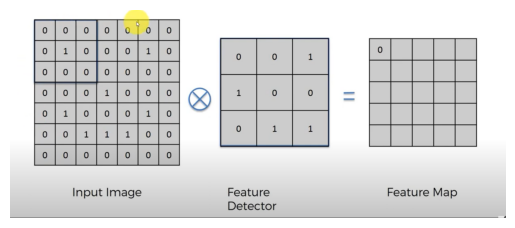

In [68]:
import matplotlib.pyplot as plt
import cv2

# Chemin vers l'image
img_fD = "./cours/feature_detector.png"

# Charger l'image avec OpenCV
image = cv2.imread(img_fD)

# Convertir l'image de BGR (format utilisé par OpenCV) à RGB (format utilisé par matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Afficher l'image avec matplotlib
plt.imshow(image_rgb)
plt.axis("off")  # Masquer les axes
plt.show()

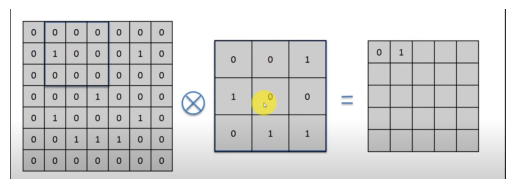

In [69]:
# Chemin vers l'image
img_fD = "./cours/feature_detector2.png"

# Charger l'image avec OpenCV
image = cv2.imread(img_fD)

# Convertir l'image de BGR (format utilisé par OpenCV) à RGB (format utilisé par matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Afficher l'image avec matplotlib
plt.imshow(image_rgb)
plt.axis("off")  # Masquer les axes
plt.show()

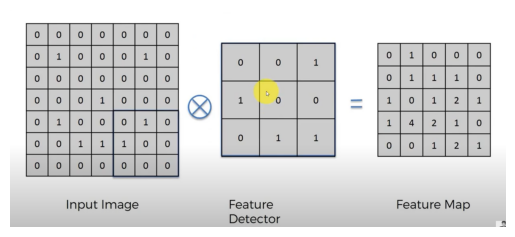

In [70]:
# Chemin vers l'image
img_fD = "./cours/feature_detector3.png"

# Charger l'image avec OpenCV
image = cv2.imread(img_fD)

# Convertir l'image de BGR (format utilisé par OpenCV) à RGB (format utilisé par matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Afficher l'image avec matplotlib
plt.imshow(image_rgb)
plt.axis("off")  # Masquer les axes
plt.show()

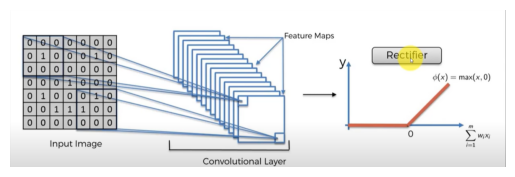

In [71]:
# Chemin vers l'image
img_fD = "./cours/after_FD.png"

# Charger l'image avec OpenCV
image = cv2.imread(img_fD)

# Convertir l'image de BGR (format utilisé par OpenCV) à RGB (format utilisé par matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Afficher l'image avec matplotlib
plt.imshow(image_rgb)
plt.axis("off")  # Masquer les axes
plt.show()


**Le max pooling** est une opération couramment utilisée dans les réseaux de neurones convolutifs (CNN) en apprentissage automatique et en vision par ordinateur. Elle vise à réduire les dimensions des données tout en conservant les caractéristiques importantes.

**Fonctionnement du Max Pooling :**

- Diviser en Sous-Régions :

L'image ou la carte de caractéristiques est divisée en sous-régions non chevauchantes, généralement de forme carrée (par exemple, 2x2 ou 3x3).

- Sélectionner le Maximum :

Pour chaque sous-région, la valeur maximale est sélectionnée et devient l'élément correspondant dans la carte de caractéristiques réduite.

**Avantages du Max Pooling**

- Réduction de la Taille :

Réduit les dimensions des cartes de caractéristiques, ce qui diminue la complexité computationnelle et la mémoire nécessaire.

- Invariance aux Petites Translations :

Rend les caractéristiques plus robustes aux petites translations et déformations dans l'image d'entrée.

- Réduction du Surapprentissage :

Agit comme une forme de régularisation, réduisant le risque de surapprentissage en condensant les informations importantes.
Utilisation dans un Réseau de Neurones Convolutifs
Dans un CNN typique, le max pooling est appliqué après des couches de convolution pour réduire la taille des cartes de caractéristiques tout en conservant les informations essentielle

In [73]:
img_mp = "./cours/MP.png"
print(img_mp)

./cours/MP.png


In [75]:
img_mp2 = "./cours/mp2.png"
img_mp3 = "./cours/mp3.png"
print(img_mp2)
print(img_mp3)

./cours/mp2.png
./cours/mp3.png


### Une fois que le max pooling est fait, nous passons au flattening

**Le flattening (aplatissement)** est une opération utilisée dans les réseaux de neurones, en particulier dans les réseaux de neurones convolutifs (CNN), pour transformer une matrice multi-dimensionnelle (comme une carte de caractéristiques 2D) en un vecteur unidimensionnel. Cette opération est souvent réalisée après les couches de convolution et de pooling et avant les couches entièrement connectées (dense).

- Pourquoi Utiliser le Flattening ?
Transition vers les Couches Entièrement Connectées :

Les couches entièrement connectées attendent une entrée unidimensionnelle (vecteur). Le flattening permet de transformer les sorties multidimensionnelles des couches convolutives en une forme compatible avec ces couches.
- Simplification des Données :

Réduit les données complexes de plusieurs dimensions en une seule dimension, facilitant le traitement ultérieur par des couches denses qui peuvent effectuer des classifications ou des régressions.

In [76]:
ft = "./cours/ft.png"
print(ft)

./cours/ft.png


### Une fois que le flattening est fini on peut passer au Neural Network

In [77]:
NT = "./cours/NT.png"
print(NT)

./cours/NT.png


In [79]:
NT2 = "./cours/NT2.png"
print(NT2)

./cours/NT2.png


**On a 2 output, une pour le chien et une pour le chat**

In [84]:
!pip install tensorflow

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB 1.7 MB/s eta 0:03:49
   ---------------------------------------- 0.1/377.0 MB 1.2 MB/s eta 0:05:09
   ---------------------------------------- 0.3/377.0 MB 1.8 MB/s eta 0:03:28
   ---------------------------------------- 0.4/377.0 MB 2.0 MB/s eta 0:03:12
   ---------------------------------------- 0.7/377.0 MB 3.0 MB/s eta 0:02:06
   ---------------------------------------- 0.8/377.0 MB 2.9 MB/s eta 0:02:10
   ---------------------------------------- 1.2/377.0 MB 3.5 MB/s eta 0:01:48
   ---------------------------------------- 1.2/377.0 MB 3.4 MB/s eta 0:01:50
   ---------------------------------------- 1.2/377.0 MB 3.4

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-tools 1.64.1 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.3 which is incompatible.


In [85]:
from tensorflow import keras

In [86]:
from tensorflow.keras.models import Sequential

In [89]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [90]:
model = Sequential()

model.add(Conv2D(64,(3,3), activation= "relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, input_shape =X.shape[1 :],activation="relu"))

model.add(Dense(2,activation="softmax"))

c:\Users\Jean-BaptisteCHEZE\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



### La ligne model = Sequential()

dans un script utilisant Keras ou TensorFlow-Keras sert à créer un modèle de réseau de neurones de type séquentiel. Un modèle séquentiel est une pile linéaire de couches, ce qui signifie que chaque couche a exactement une couche d'entrée et une couche de sortie.

Pourquoi Utiliser un Modèle Séquentiel
Le modèle séquentiel est idéal pour les réseaux de neurones qui se composent d'une simple pile de couches où chaque couche a exactement une entrée et une sortie. C'est le choix par défaut pour les modèles où les données passent à travers les couches de manière séquentielle, sans branchements ni fusions complexes.



### La ligne model.add(Conv2D(64, (3, 3), activation='relu')) 

ajoute une couche de convolution bidimensionnelle (Conv2D) à votre modèle séquentiel. Cette couche est essentielle dans les réseaux de neurones convolutifs (CNN) pour le traitement d'images. Voici une explication détaillée de cette ligne de code.

Décomposition de la Ligne
Conv2D :

- Il s'agit d'une couche de convolution bidimensionnelle, souvent utilisée pour traiter des images ou des données en forme de grille 2D (comme des matrices de pixels).
64 :

- Le nombre de filtres (ou noyaux de convolution) dans la couche. Chaque filtre détecte une caractéristique particulière de l'image (par exemple, des bords, des textures).
(3, 3) :

- La taille des filtres (ou noyaux de convolution). Un filtre de taille 3x3 glisse sur l'image pour extraire des caractéristiques locales.
activation='relu' :

- La fonction d'activation ReLU (Rectified Linear Unit) est appliquée à la sortie de chaque neurone. Elle remplace les valeurs négatives par zéro et maintient les valeurs positives, introduisant ainsi de la non-linéarité dans le modèle.


### La ligne model.add(MaxPooling2D((2, 2))) 

dans un script utilisant Keras ou TensorFlow-Keras ajoute une couche de max pooling bidimensionnelle à votre modèle séquentiel. Le max pooling est une opération de sous-échantillonnage qui réduit les dimensions des cartes de caractéristiques en ne conservant que les valeurs maximales dans des sous-régions définies. Voici une explication détaillée de cette ligne de code.

### La ligne model.add(Flatten()) 

dans un script utilisant Keras ou TensorFlow-Keras ajoute une couche de flattening (aplatissement) à votre modèle séquentiel. Cette couche est utilisée pour transformer une matrice de caractéristiques multi-dimensionnelle en un vecteur unidimensionnel. Cette transformation est nécessaire avant de connecter les couches convolutives et de pooling à des couches entièrement connectées (dense) dans un réseau de neurones.

Pourquoi Utiliser une Couche de Flattening
- Transition vers les Couches Entièrement Connectées :

Les couches convolutives et de pooling produisent des cartes de caractéristiques multi-dimensionnelles. Cependant, les couches entièrement connectées (Dense) attendent des vecteurs unidimensionnels comme entrée. La couche Flatten résout ce problème en transformant les matrices de caractéristiques en vecteurs.
- Préservation de l'Information :

Flatten préserve toutes les informations des cartes de caractéristiques, mais les organise en un seul vecteur de manière linéarisée.

In [91]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [92]:
model.fit(X,y,epochs=5,validation_split=0.1)

Epoch 1/5
482/482 ━━━━━━━━━━━━━━━━━━━━ 167s 340ms/step - accuracy: 0.6771 - loss: 0.6429 - val_accuracy: 0.7363 - val_loss: 0.5434
Epoch 2/5
482/482 ━━━━━━━━━━━━━━━━━━━━ 185s 384ms/step - accuracy: 0.7342 - loss: 0.5417 - val_accuracy: 0.7602 - val_loss: 0.4913
Epoch 3/5
482/482 ━━━━━━━━━━━━━━━━━━━━ 136s 282ms/step - accuracy: 0.8017 - loss: 0.4331 - val_accuracy: 0.7847 - val_loss: 0.4603
Epoch 4/5
482/482 ━━━━━━━━━━━━━━━━━━━━ 142s 294ms/step - accuracy: 0.8348 - loss: 0.3650 - val_accuracy: 0.7853 - val_loss: 0.4613
Epoch 5/5
482/482 ━━━━━━━━━━━━━━━━━━━━ 133s 276ms/step - accuracy: 0.8744 - loss: 0.2934 - val_accuracy: 0.7859 - val_loss: 0.5086
